In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as stl
stl.use('default')
import random
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, Adam
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
from keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Questão 1

Utilize redes neurais perceptron de múltiplas camadas para aproximar as funções abaixo. 
Apresente um gráfico com a curva da função analítica e a curva da função aproximada
pela rede neural. Apresente também a curva do erro médio de treinamento com relação ao
número de épocas e a curva do erro médio com o conjunto de validação. Procure definir
para cada função a arquitetura da rede neural perceptron, isto é, o número de entradas, o
número de neurônios em cada camada e o número de neurônios camada de saída.

### a) f (x1,x2) = (1 -x1)² + 100 (x2 - x1²)  com  -10 ≤ x1 ≤ 10 e -10 ≤ x2 ≤ 10
 

In [4]:
#Representando a função da letra A no python
def letraA(x1,x2):
  return (1 - x1)**2 + 100*(x2 - (x1)**2)**2

In [5]:
#Gerando os pontos 
x1, x2 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
y = letraA(x1,x2)

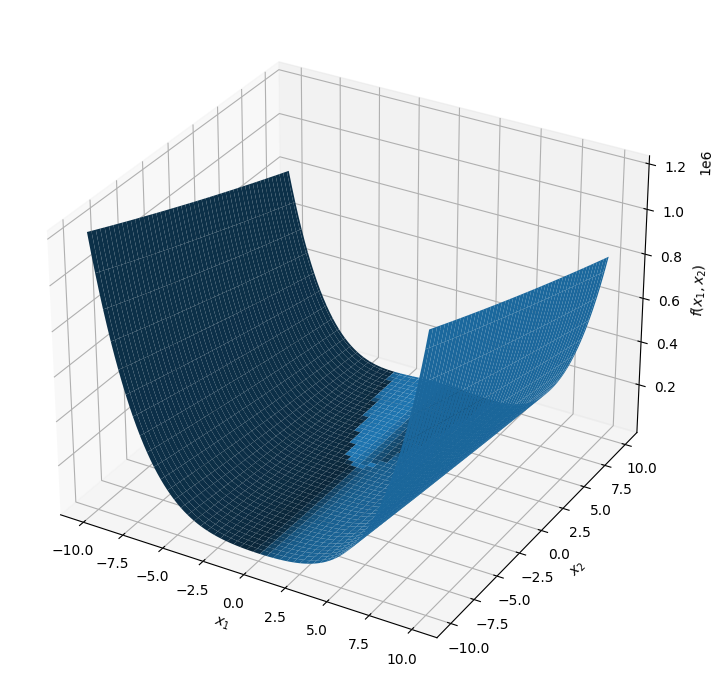

In [9]:
#Plotando nosso gráfico em uma projeção 3d
fig, ax = plt.subplots(figsize=(10, 7), subplot_kw=dict(projection='3d'))

ax.plot_surface(x1, x2, y)

ax.set(
    xlabel='$x_1$',
    ylabel='$x_2$',
    zlabel='$f(x_1, x_2)$'
)

plt.tight_layout()
plt.show()

In [10]:
# criando nossos vetores de x de teste x de treino , y de teste e y de treino
x_train, x_test, y_train, y_test = train_test_split(
    np.vstack([x1.flatten(), x2.flatten()]).T, 
    y.flatten(), 
    test_size=0.2, 
    random_state=42
)

In [11]:
scaler = StandardScaler()

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

scaler.fit(y_train)
 
y_train = scaler.transform(y_train)
 
y_test = scaler.transform(y_test)

In [12]:
# Ciando nossa model com as funções de ativação e os otimizadores

mlp = Sequential([
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='linear')
])

mlp.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 4)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,977
Trainable params: 2,977
Non-trainabl

In [13]:
#Efeituando o treinamento da rede com 2000 épocas
history = mlp.fit(
    x_train, y_train,
    batch_size=8,
    epochs=2000,
    validation_split=0.1,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=0.0001)
    ]
)

Epoch 1/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.2354 - val_loss: 0.0574 - lr: 0.0010
Epoch 2/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.0365 - val_loss: 0.0171 - lr: 0.0010
Epoch 3/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.0224 - val_loss: 0.0140 - lr: 0.0010
Epoch 4/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.0193 - val_loss: 0.0076 - lr: 0.0010
Epoch 5/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.0112 - val_loss: 0.0066 - lr: 0.0010
Epoch 6/2000
900/900 [==============================] - 3s 3ms/step - loss: 0.0146 - val_loss: 0.0563 - lr: 0.0010
Epoch 7/2000
900/900 [==============================] - 2s 2ms/step - loss: 0.0094 - val_loss: 0.0064 - lr: 0.0010
Epoch 8/2000
900/900 [==============================] - 2s 2ms/step - loss: 0.0101 - val_loss: 0.0051 - lr: 0.0010
Epoch 9/2000
900/900 [==============================] - 2s 3ms/step - loss: 0.00

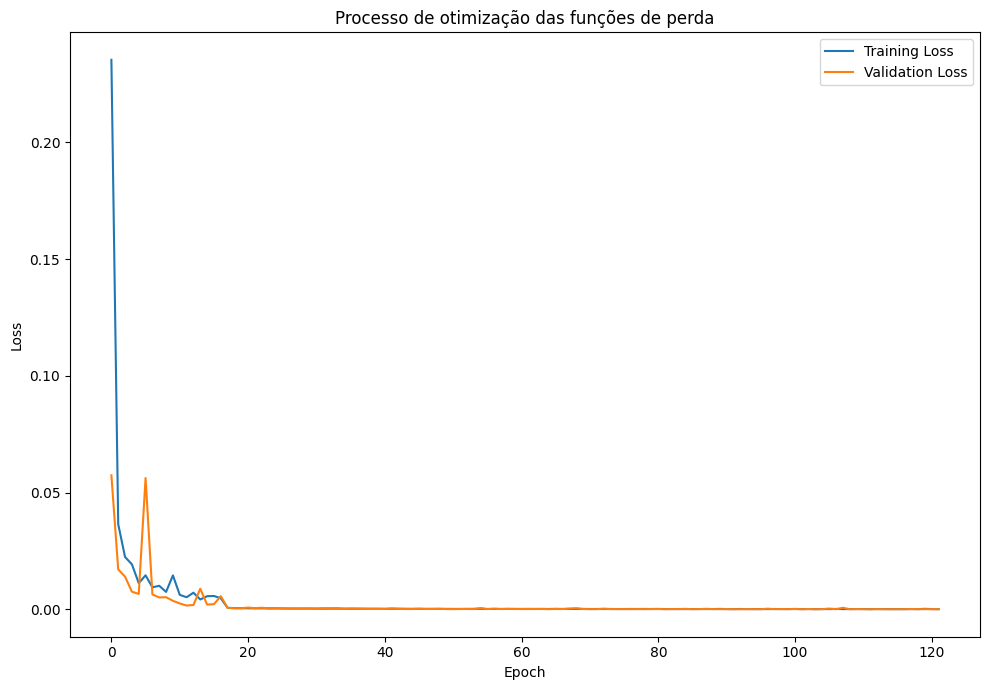

In [14]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(history.history['loss'], label='Training Loss')
ax.plot(history.history['val_loss'], label='Validation Loss')

ax.set(
    title='Processo de otimização das funções de perda',
    ylabel='Loss',
    xlabel='Epoch'
)

plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# realizando as predições
predictions = mlp.predict(x_test)
inverse_predictions = scaler.inverse_transform(predictions)

63/63 [==============================] - 0s 2ms/step


In [20]:
vetx = np.vstack([x1.flatten(), x2.flatten()]).T

vety = y.reshape(-1,1)

scaler.fit(vety)
 
vety = scaler.transform(vety)

predictions = mlp.predict(vetx)
inverse_predictions2 = scaler.inverse_transform(predictions)

313/313 [==============================] - 1s 2ms/step


In [24]:
mse = mean_squared_error(scaler.inverse_transform(y_test), inverse_predictions)
rmse = mean_squared_error(scaler.inverse_transform(y_test), inverse_predictions, squared=False)
mae = mean_absolute_error(scaler.inverse_transform(y_test), inverse_predictions)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 6033686.639856945
Root Mean Squared Error: 2456.3563747666876
Mean Absolute Error: 1627.9468528865343


## b) x1² +x2² + 2x1x2 * cos(pi*x1x2) + x1 + x2 - 1 com |x1| <= 1 e |x2| <= 1


In [27]:
def letraB(x1,x2):
  return x1**2 + x2**2 + 2 * x1 * x2 * np.cos(np.pi * x1 * x2) + x1 + x2 - 1

In [31]:
x = np.arange(-1,1,0.05) #function range
xy = [(j,k) for j in x for k in x]
out = [letraB(p[0],p[1]) for p in xy]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(xy, out)

In [33]:
#mse array
arr = np.empty(5)

In [34]:
# set up network with parameters
mlp = MLPRegressor( hidden_layer_sizes=[5], max_iter=1000, tol=0)

# train network
mlp.fit(x_train,y_train)

# test
predictions = mlp.predict(x_test)

mse = mean_squared_error(y_test, predictions)
mse

c:\Users\efrai\Documents\Academico\PDS\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.14709835264316617

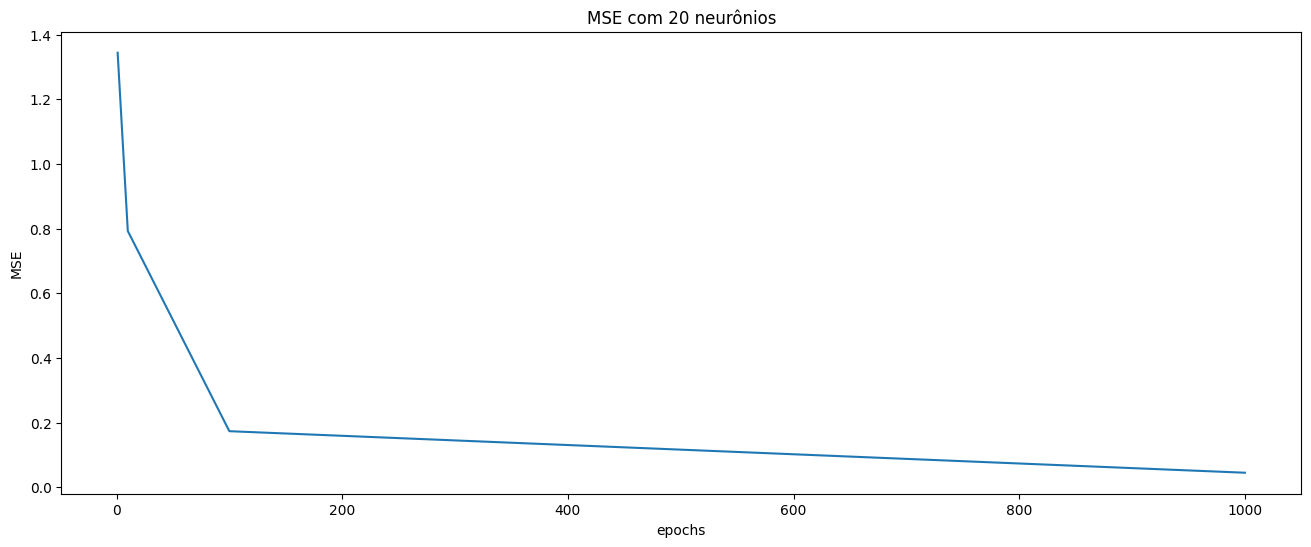

In [35]:
# 5 neuronios 1-10-100-1000 4.038911905915415, 1.2585460364771435, 0.5077961249121123, 0.16822347972521962
# 20 neuronios 1 - 10 - 100 - 1000 1.3438102594204995, 0.7924179590331073, 0.1731673482314536, 0.044706593435991114
y = np.array([1.3438102594204995, 0.7924179590331073, 0.1731673482314536, 0.044706593435991114])
x = np.array([1, 10, 100, 1000])
plt.rcParams["figure.figsize"] = (10,6)
plt.figure(figsize=(16,6))
plt.plot(x,y) 

# Add Title

plt.title("MSE com 20 neurônios") 

# Add Axes Labels

plt.xlabel("epochs") 
plt.ylabel("MSE") 

# Display

plt.show()

C:\Users\efrai\AppData\Local\Temp\ipykernel_16764\2632060632.py:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


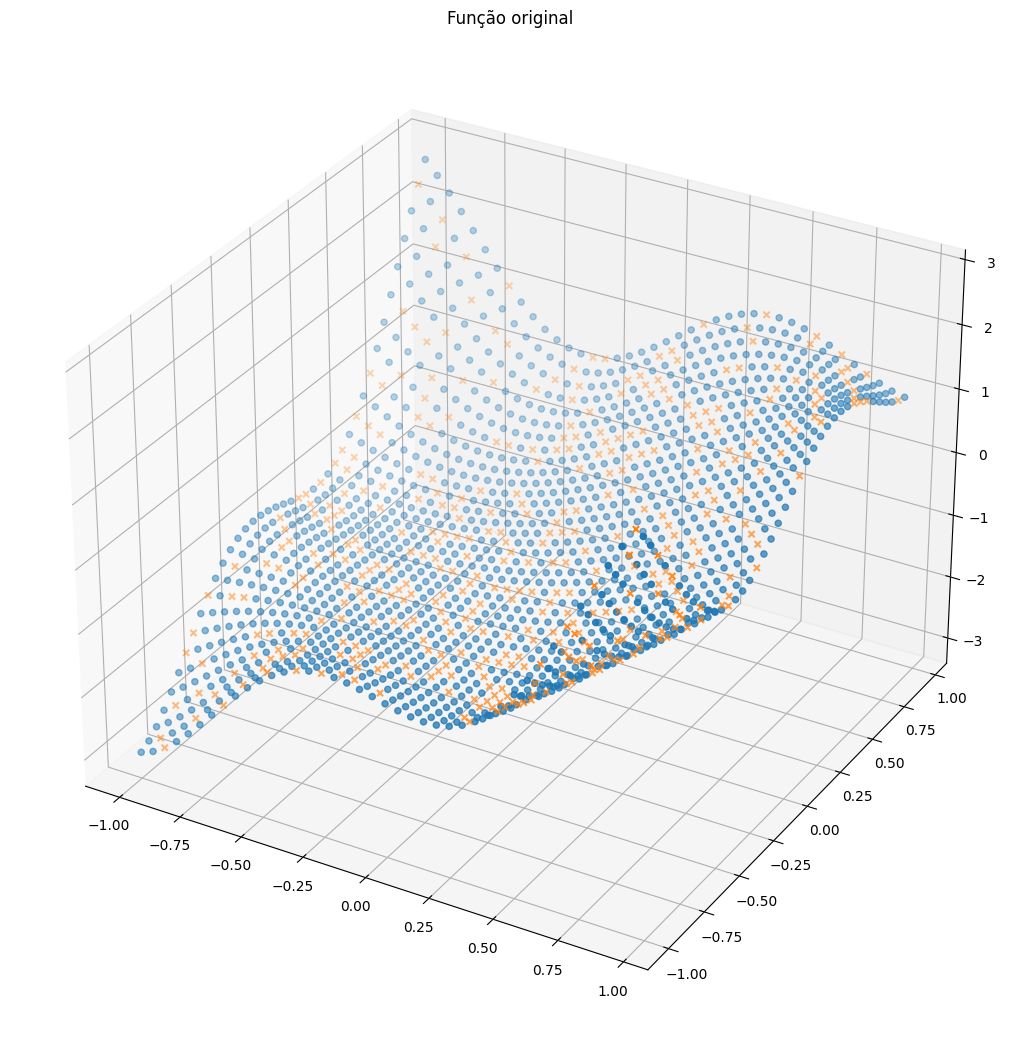

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (16,13)
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title("Função original") 
# plot train data points
x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])

ax.scatter(x1_vals, x2_vals, y_train)

# plot test data points
x1_vals = np.array([p[0] for p in x_test])
x2_vals = np.array([p[1] for p in x_test])
ax.scatter(x1_vals, x2_vals, y_test, marker='x')
#ax.scatter(x1_vals, x2_vals, predictions, c='red')

plt.show()

C:\Users\efrai\AppData\Local\Temp\ipykernel_16764\723543216.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


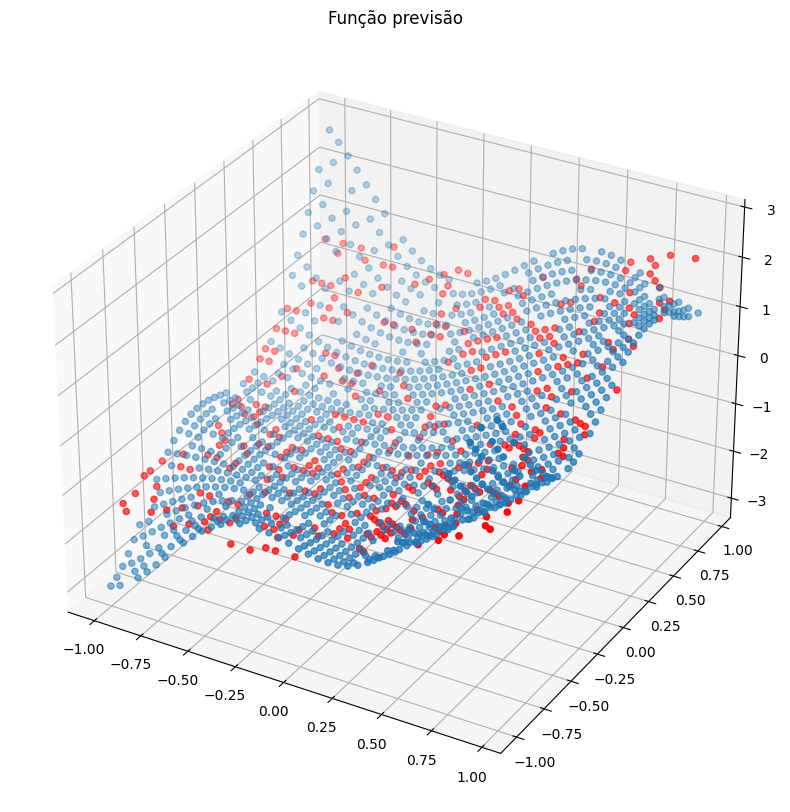

In [37]:
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = (20,10)
fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title("Função previsão") 

x1_vals = np.array([p[0] for p in x_train])
x2_vals = np.array([p[1] for p in x_train])

ax.scatter(x1_vals, x2_vals, y_train)

# plot test data points
x1_vals = np.array([p[0] for p in x_test])
x2_vals = np.array([p[1] for p in x_test])
ax.scatter(x1_vals, x2_vals, predictions, c='red') #prediction

plt.show()